Has to manually remove the extremly large baseline BMI in BG and BPBG data!!! (Did this with Excel)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bp_df = pd.read_csv('Contextual_test_BPClass_inference.csv')
bg_df = pd.read_csv('Contextual_test_BGClass_inference.csv')
bpbg_df = pd.read_csv('Contextual_test_BPBGClass_inference.csv')

## Table 1 - Inconsistent

In [22]:
print(bp_df.columns)
print(bg_df.columns)
print(bpbg_df.columns)

Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'cvdrisk_fb', 'state_code_cln', 'action_code_cln',
       'med_list_cln', 'sbp_fb_cln', 'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'hba1c_fb', 'cvdrisk_fb', 'state_code_cln',
       'action_code_cln', 'med_list_cln', 'sbp_fb_cln', 'hba1c_fb_cln',
       'cvdrisk_fb_cln'],
      dtype='object')
Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_b

In [23]:
def check_inconsistent_data(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    # select rows with inconsistent `action_code` and `action_code_cln`
    inconsistent_df = df.loc[df['action_code'] != df['action_code_cln']]
    print('inconsistent_df.shape: ', inconsistent_df.shape)

    inconsistent_df_len = inconsistent_df.shape[0]

    print('{:.2f}'.format(inconsistent_df_len / df_len * 100))

    if flag == 'bp':
        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 125].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 125].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    
    if flag == 'bg':
        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.5].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.5].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    if flag == 'bpbg':

        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 125].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 125].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln/inconsistent_df_len*100))

        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.5].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.5].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.2f}[{:.2f}]\t{:.2f}[{:.2f}]'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.2f}\t{:.2f}'.format(cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln/inconsistent_df_len*100))    
    
check_inconsistent_data(bp_df, 'bp')
check_inconsistent_data(bg_df, 'bg')
check_inconsistent_data(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
inconsistent_df.shape:  (81560, 21)
93.40
125.11[2.75]	126.14[2.72]
47.80	66.65
0.21[0.12]	0.21[0.12]
43.99	44.94

---bg---
df.shape:  (161440, 23)
inconsistent_df.shape:  (153023, 23)
94.79
7.00[0.25]	7.10[0.27]
2.66	6.03
0.23[0.12]	0.23[0.12]
51.83	52.39

---bpbg---
df.shape:  (71880, 23)
inconsistent_df.shape:  (66404, 23)
92.38
125.35[2.51]	126.35[2.74]
51.80	68.76
7.32[0.28]	7.16[0.33]
26.98	16.13
0.22[0.12]	0.22[0.12]
46.28	47.43


## Table 2 - Demographics

In [24]:
def check_demographics(bp_df, bg_df, bpbg_df):


    # select rows with inconsistent `action_code` and `action_code_cln`
    bp_incons_df = bp_df.loc[bp_df['action_code'] != bp_df['action_code_cln']]
    bg_incons_df = bg_df.loc[bg_df['action_code'] != bg_df['action_code_cln']]
    bpbg_incons_df = bpbg_df.loc[bpbg_df['action_code'] != bpbg_df['action_code_cln']]

    bp_cons_df = bp_df.loc[bp_df['action_code'] == bp_df['action_code_cln']]
    bg_cons_df = bg_df.loc[bg_df['action_code'] == bg_df['action_code_cln']]
    bpbg_cons_df = bpbg_df.loc[bpbg_df['action_code'] == bpbg_df['action_code_cln']]

    print("No/Yes %")
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df.shape[0]/bp_df.shape[0]*100, bp_cons_df.shape[0]/bp_df.shape[0]*100,
        bg_incons_df.shape[0]/bg_df.shape[0]*100, bg_cons_df.shape[0]/bg_df.shape[0]*100,
        bpbg_incons_df.shape[0]/bpbg_df.shape[0]*100, bpbg_cons_df.shape[0]/bpbg_df.shape[0]*100
    ))
    print()

    # print the average value of `baseline_age` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_age'].mean(), bp_cons_df['baseline_age'].mean(),
        bg_incons_df['baseline_age'].mean(), bg_cons_df['baseline_age'].mean(),
        bpbg_incons_df['baseline_age'].mean(), bpbg_cons_df['baseline_age'].mean()
    ))

    # print the average value of `female` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['female'].mean()*100, bp_cons_df['female'].mean()*100,
        bg_incons_df['female'].mean()*100, bg_cons_df['female'].mean()*100,
        bpbg_incons_df['female'].mean()*100, bpbg_cons_df['female'].mean()*100
    ))
    print()

    # print the average value of `race_whiteother` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['race_whiteother'].mean()*100, bp_cons_df['race_whiteother'].mean()*100,
        bg_incons_df['race_whiteother'].mean()*100, bg_cons_df['race_whiteother'].mean()*100,
        bpbg_incons_df['race_whiteother'].mean()*100, bpbg_cons_df['race_whiteother'].mean()*100
    ))
      
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        (1-bp_incons_df['race_whiteother'].mean())*100, (1-bp_cons_df['race_whiteother'].mean())*100,
        (1-bg_incons_df['race_whiteother'].mean())*100, (1-bg_cons_df['race_whiteother'].mean())*100,
        (1-bpbg_incons_df['race_whiteother'].mean())*100, (1-bpbg_cons_df['race_whiteother'].mean())*100
    ))

    # print the average value of `cvd_hx_baseline` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cvd_hx_baseline'].mean()*100, bp_cons_df['cvd_hx_baseline'].mean()*100,
        bg_incons_df['cvd_hx_baseline'].mean()*100, bg_cons_df['cvd_hx_baseline'].mean()*100,
        bpbg_incons_df['cvd_hx_baseline'].mean()*100, bpbg_cons_df['cvd_hx_baseline'].mean()*100
    ))

    # print the average value of `cigarett_baseline_1` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cigarett_baseline_1'].mean()*100, bp_cons_df['cigarett_baseline_1'].mean()*100,
        bg_incons_df['cigarett_baseline_1'].mean()*100, bg_cons_df['cigarett_baseline_1'].mean()*100,
        bpbg_incons_df['cigarett_baseline_1'].mean()*100, bpbg_cons_df['cigarett_baseline_1'].mean()*100
    ))

    # print the average value of `baseline_BMI` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_BMI'].mean(), bp_cons_df['baseline_BMI'].mean(),
        bg_incons_df['baseline_BMI'].mean(), bg_cons_df['baseline_BMI'].mean(),
        bpbg_incons_df['baseline_BMI'].mean(), bpbg_cons_df['baseline_BMI'].mean()
    ))

check_demographics(bp_df, bg_df, bpbg_df)

No/Yes %
93.40	6.60	94.79	5.21	92.38	7.62

62.61	63.03	63.01	63.11	62.90	63.20
47.55	46.81	36.44	37.83	46.10	44.65

77.35	73.09	80.18	79.39	75.95	73.50
22.65	26.91	19.82	20.61	24.05	26.50
33.82	30.10	35.68	35.26	33.68	34.20
13.44	12.19	14.50	14.14	13.63	12.93
32.06	32.21	31.99	32.05	31.83	32.13


## Table 4 - Check Subgroup

In [25]:
def check_feedback(df_sub, flag):
    res = []
    res.append(df_sub.shape[0])
    
    if flag == 'bp':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)

    if flag == 'bg':
        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    if flag == 'bpbg':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)                

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    # print values in res in a row
    print('\t'.join(map(str, res)))

def check_subgroup(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    df_sub = df.loc[df['baseline_age'] > 60]
    # print('age>60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['baseline_age'] <= 60]
    # print('age<=60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 1]
    # print('female:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 0]
    # print('male:')
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['race_whiteother'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['race_whiteother'] == 0]
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['cvd_hx_baseline'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cvd_hx_baseline'] == 0]
    check_feedback(df_sub, flag)   

    df_sub = df.loc[df['cigarett_baseline_1'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cigarett_baseline_1'] == 0]
    check_feedback(df_sub, flag)      

    df_sub = df.loc[df['baseline_BMI'] >= 25]
    check_feedback(df_sub, flag)


check_subgroup(bp_df, 'bp')
check_subgroup(bg_df, 'bg')
check_subgroup(bpbg_df, 'bpbg')


---bp---
df.shape:  (87320, 21)
52400	125.84[2.64]	126.74[2.64]	-0.90[2.71]	0.26[0.12]	0.26[0.12]	-0.00[0.05]
34920	124.04[2.55]	125.09[2.56]	-1.05[2.72]	0.14[0.07]	0.14[0.07]	-0.00[0.04]
41480	125.42[2.74]	126.37[2.70]	-0.95[2.71]	0.16[0.09]	0.16[0.09]	-0.00[0.04]
45840	124.85[2.73]	125.82[2.73]	-0.97[2.72]	0.26[0.13]	0.27[0.13]	-0.00[0.05]
67300	124.31[2.31]	125.31[2.34]	-1.00[2.71]	0.20[0.12]	0.21[0.12]	-0.00[0.05]
20020	127.85[2.32]	128.68[2.33]	-0.83[2.72]	0.24[0.13]	0.24[0.13]	-0.00[0.05]
29320	124.96[2.76]	125.97[2.76]	-1.01[2.69]	0.23[0.13]	0.23[0.13]	-0.00[0.05]
58000	125.20[2.74]	126.14[2.72]	-0.94[2.72]	0.20[0.12]	0.21[0.11]	-0.00[0.05]
11660	124.97[2.78]	126.01[2.71]	-1.03[2.71]	0.29[0.13]	0.29[0.13]	-0.00[0.06]
75660	125.14[2.74]	126.09[2.73]	-0.95[2.71]	0.20[0.11]	0.20[0.11]	-0.00[0.05]
79180	125.07[2.74]	126.00[2.73]	-0.93[2.72]	0.21[0.12]	0.21[0.12]	-0.00[0.05]

---bg---
df.shape:  (161440, 23)
100860	6.95[0.24]	7.04[0.26]	-0.10[0.30]	0.28[0.12]	0.29[0.12]	-0.00[0.01]


## Fig 1 2 3 - Med Class Combo Frequency plot


---bp---


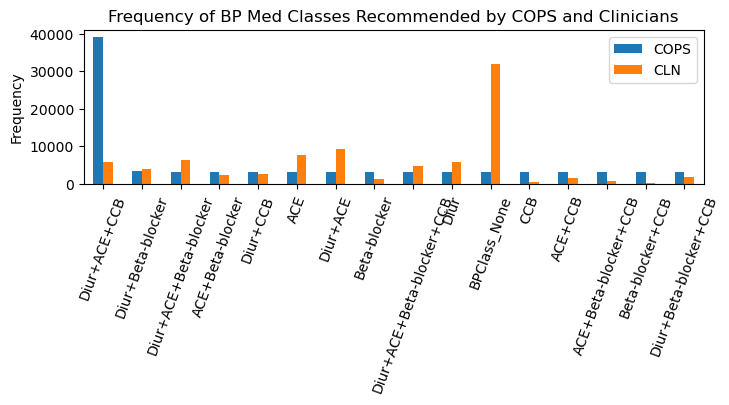


---bg---


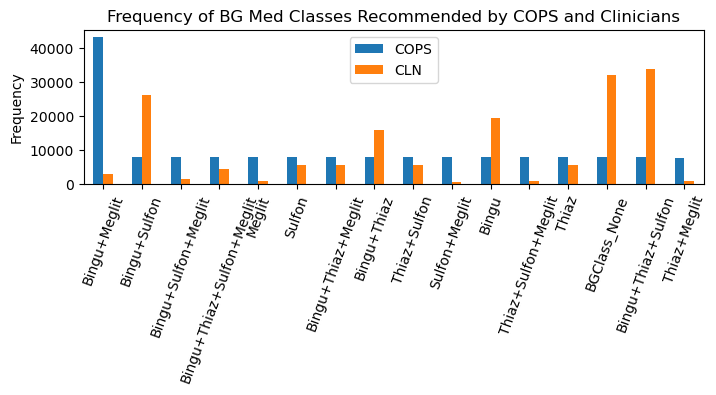


---bpbg---


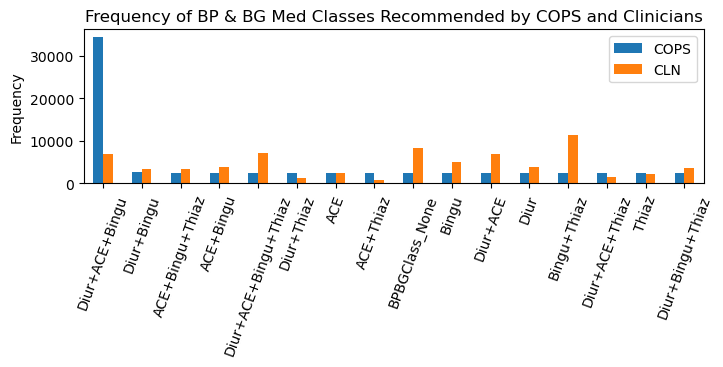

In [26]:
# use bar chart to show the frequency of med_list Column for COPS and Clinicians
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    # get the frequency count of each unique value in med_list Column in bp_df
    med_COPS = df['med_list'].value_counts()
    med_CLN = df['med_list_cln'].value_counts()

    # merge the two series into a dataframe
    med_df = pd.concat([med_COPS, med_CLN], axis=1)
    med_df.columns = ['COPS', 'CLN']
    # fill the NaN with 0
    med_df = med_df.fillna(0)
    # print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(8,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    # plt.xlabel('med_list')
    # rotate x-axis label
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Med Class Frequency plot


---bp---
med_cops:  {'Diur': 61716, 'ACE': 61612, 'CCB': 61329, 'Beta-blocker': 25767, 'BPClass_None': 3201}
med_cln:  {'ACE': 38930, 'Diur': 40769, 'CCB': 18326, 'BPClass_None': 32061, 'Beta-blocker': 21787}
               COPS    CLN
Diur          61716  40769
ACE           61612  38930
CCB           61329  18326
Beta-blocker  25767  21787
BPClass_None   3201  32061


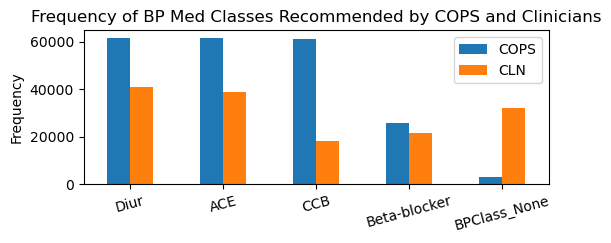


---bg---
med_cops:  {'Bingu': 98564, 'Meglit': 98447, 'Thiaz': 62840, 'Sulfon': 63258, 'BGClass_None': 7827}
med_cln:  {'BGClass_None': 32183, 'Bingu': 109584, 'Thiaz': 72235, 'Sulfon': 78281, 'Meglit': 17287}
               COPS     CLN
Bingu         98564  109584
Meglit        98447   17287
Thiaz         62840   72235
Sulfon        63258   78281
BGClass_None   7827   32183


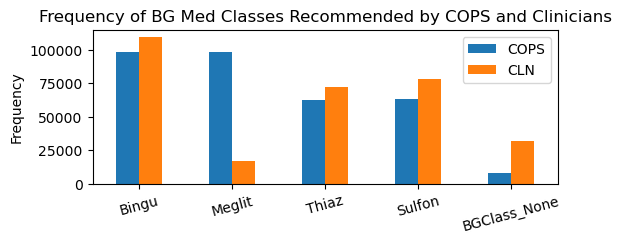


---bpbg---
med_cops:  {'Diur': 51920, 'ACE': 51895, 'Bingu': 51989, 'Thiaz': 19873, 'BPBGClass_None': 2497}
med_cln:  {'ACE': 32758, 'Diur': 34480, 'Bingu': 44636, 'Thiaz': 31292, 'BPBGClass_None': 8318}
                 COPS    CLN
Diur            51920  34480
ACE             51895  32758
Bingu           51989  44636
Thiaz           19873  31292
BPBGClass_None   2497   8318


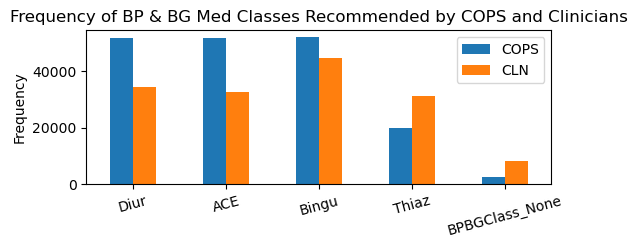

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS', 'CLN']
    print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(6,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Success Rate

### CVDRisk reduction

In [28]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_cvd_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient, starting from the second visit
        for j in range(1, len(df_patient)):
            row = df_patient.iloc[j]
            prev_cvd = df_patient.iloc[j-1]['cvdrisk_fb']
            current_cvd = row['cvdrisk_fb']
            if current_cvd < prev_cvd:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient) - 1))
    
    return success_rate

bp_cvd_suc_rate = get_cvd_success_rate(bp_df)
bg_cvd_suc_rate = get_cvd_success_rate(bg_df)
bpbg_cvd_suc_rate = get_cvd_success_rate(bpbg_df)

print('bp_cvd_suc_rate: ', bp_cvd_suc_rate)
print('bg_cvd_suc_rate: ', bg_cvd_suc_rate)
print('bpbg_cvd_suc_rate: ', bpbg_cvd_suc_rate)

100%|██████████| 10251/10251 [00:18<00:00, 542.75it/s]

bp_cvd_suc_rate:  [0.42105263157894735, 0.47368421052631576, 0.3157894736842105, 0.42105263157894735, 0.2631578947368421, 0.2631578947368421, 0.2631578947368421, 0.47368421052631576, 0.15789473684210525, 0.2631578947368421, 0.3157894736842105, 0.2631578947368421, 0.3684210526315789, 0.3157894736842105, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.3684210526315789, 0.47368421052631576, 0.3684210526315789, 0.3684210526315789, 0.21052631578947367, 0.3157894736842105, 0.3684210526315789, 0.2631578947368421, 0.3684210526315789, 0.3684210526315789, 0.15789473684210525, 0.47368421052631576, 0.42105263157894735, 0.3684210526315789, 0.15789473684210525, 0.21052631578947367, 0.3684210526315789, 0.3157894736842105, 0.2631578947368421, 0.15789473684210525, 0.3157894736842105, 0.2631578947368421, 0.42105263157894735, 0.3157894736842105, 0.3684210526315789, 0.3684210526315789, 0.47368421052631576, 0.3157894736842105, 0.2631578947368421, 0.3157894736842105, 0.3157894736842105, 0.105

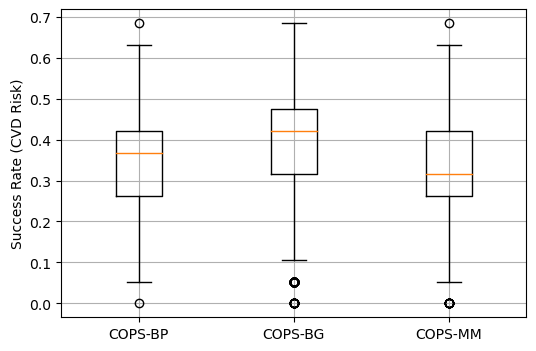

In [29]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bp_cvd_suc_rate, bg_cvd_suc_rate, bpbg_cvd_suc_rate]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3], ['COPS-BP', 'COPS-BG', 'COPS-MM'])
plt.ylabel('Success Rate (CVD Risk)')
plt.grid()
plt.show()

### SBP

In [30]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_sbp_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_sbp = row['sbp_fb']
            if current_sbp < 125 and current_sbp >= 110:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient)))
    
    return success_rate

bp_sbp_suc_rate = get_sbp_success_rate(bp_df)
bg_sbp_suc_rate = get_sbp_success_rate(bg_df)
bpbg_sbp_suc_rate = get_sbp_success_rate(bpbg_df)

print('bp_sbp_suc_rate: ', bp_sbp_suc_rate)
print('bg_sbp_suc_rate: ', bg_sbp_suc_rate)
print('bpbg_sbp_suc_rate: ', bpbg_sbp_suc_rate)

100%|██████████| 10251/10251 [00:11<00:00, 870.17it/s]

bp_sbp_suc_rate:  [0.55, 0.45, 0.0, 0.9, 0.9, 0.05, 0.7, 0.8, 0.85, 0.7, 0.85, 0.45, 0.75, 0.55, 0.75, 0.1, 1.0, 0.95, 0.8, 0.65, 0.75, 0.95, 0.7, 0.8, 0.85, 0.7, 0.75, 0.8, 0.75, 0.7, 0.0, 0.95, 0.85, 0.05, 0.6, 0.7, 0.95, 0.6, 0.8, 0.75, 0.85, 0.65, 0.75, 0.45, 0.0, 0.9, 0.8, 0.75, 0.9, 0.7, 0.0, 0.7, 0.6, 0.0, 0.55, 0.0, 0.5, 1.0, 0.0, 0.7, 0.75, 0.7, 0.65, 0.55, 0.0, 0.5, 0.75, 0.7, 0.6, 0.8, 0.65, 0.55, 0.85, 0.45, 0.8, 0.9, 0.55, 0.85, 0.9, 0.5, 0.85, 0.95, 0.0, 0.7, 0.7, 0.8, 0.75, 0.7, 0.4, 0.5, 0.0, 0.0, 0.85, 0.5, 0.0, 0.65, 0.55, 0.75, 0.8, 0.4, 0.85, 0.7, 0.85, 0.75, 0.75, 0.7, 0.85, 0.0, 0.7, 0.75, 0.8, 0.4, 0.85, 0.4, 0.75, 0.75, 0.95, 0.95, 0.9, 0.3, 0.0, 0.9, 0.6, 0.7, 0.25, 0.7, 0.85, 0.7, 0.5, 0.85, 0.6, 0.9, 0.75, 0.7, 0.4, 0.95, 0.8, 0.0, 0.75, 1.0, 0.65, 0.45, 0.95, 0.7, 0.75, 0.0, 0.9, 0.6, 0.55, 0.7, 0.45, 0.85, 0.0, 0.95, 0.8, 0.95, 0.0, 0.55, 0.5, 0.7, 0.0, 0.05, 0.65, 0.0, 0.95, 0.7, 0.05, 0.85, 0.7, 0.05, 0.0, 0.85, 0.85, 0.7, 0.7, 0.9, 1.0, 0.75, 0.75, 0.7, 

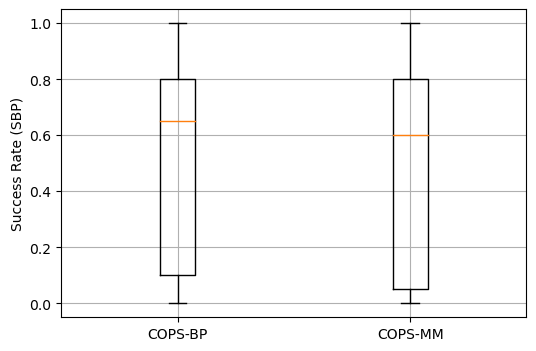

In [31]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bp_sbp_suc_rate, bpbg_sbp_suc_rate]

plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2], ['COPS-BP', 'COPS-MM'])
plt.ylabel('Success Rate (SBP)')
plt.grid()
plt.show()

### A1C

In [32]:
# get the success rate of CVDRisk reduction 
from tqdm import tqdm

def get_a1c_success_rate(df):

    success_rate = []

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        su_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_a1c = row['hba1c_fb']
            if current_a1c <= 7.9  and current_a1c >= 7.0:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient)))
    
    return success_rate

bg_a1c_suc_rate = get_a1c_success_rate(bg_df)
bpbg_a1c_suc_rate = get_a1c_success_rate(bpbg_df)

print('bg_a1c_suc_rate: ', bg_a1c_suc_rate)
print('bpbg_a1c_suc_rate: ', bpbg_a1c_suc_rate)

100%|██████████| 10251/10251 [00:12<00:00, 821.29it/s]

bg_a1c_suc_rate:  [0.3, 0.65, 0.95, 0.15, 0.65, 0.65, 0.55, 0.05, 0.85, 0.75, 0.9, 0.35, 0.4, 0.95, 0.25, 0.75, 0.2, 0.45, 0.45, 0.65, 0.7, 0.2, 0.7, 0.6, 0.95, 0.35, 0.1, 0.1, 0.65, 0.2, 0.1, 0.25, 0.3, 0.35, 0.25, 0.8, 0.45, 0.4, 0.35, 0.0, 0.3, 0.55, 0.6, 0.75, 0.05, 0.95, 0.45, 1.0, 0.3, 0.75, 0.85, 0.8, 0.55, 0.25, 0.4, 0.45, 0.85, 0.5, 0.45, 0.25, 0.7, 0.85, 0.75, 0.05, 0.55, 1.0, 0.7, 0.25, 0.6, 0.25, 0.85, 0.35, 0.2, 0.35, 0.3, 0.75, 0.6, 0.7, 0.1, 0.55, 0.9, 0.5, 0.35, 0.8, 0.3, 0.45, 0.15, 0.55, 0.3, 0.45, 0.35, 0.55, 0.35, 0.7, 0.45, 0.6, 0.2, 0.25, 0.6, 0.65, 0.35, 0.4, 0.1, 0.75, 0.35, 0.4, 0.25, 0.15, 0.25, 0.35, 0.75, 0.65, 0.3, 0.35, 0.2, 0.4, 0.3, 0.0, 0.65, 0.5, 0.2, 0.1, 0.3, 0.35, 0.75, 0.15, 0.6, 0.55, 0.6, 0.9, 0.25, 0.65, 0.5, 0.85, 0.3, 0.3, 0.0, 0.1, 0.85, 1.0, 0.35, 0.5, 0.4, 0.25, 0.4, 0.45, 0.4, 0.6, 0.3, 0.4, 0.85, 0.3, 0.3, 0.6, 0.4, 0.95, 0.4, 0.15, 0.95, 0.35, 0.35, 0.8, 0.2, 0.45, 0.05, 0.2, 0.25, 0.1, 0.25, 0.1, 0.7, 0.75, 0.6, 0.15, 0.9, 1.0, 0.4, 0.5

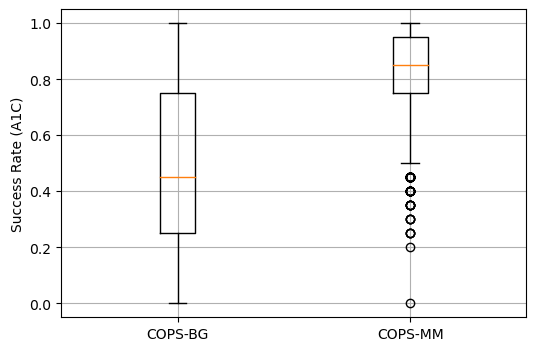

In [33]:
# plot the box plot of success rate, one for bp, one for bg, one for bpbg
import matplotlib.pyplot as plt

# Combine data into a list
data = [bg_a1c_suc_rate, bpbg_a1c_suc_rate]

plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2], ['COPS-BG', 'COPS-MM'])
plt.ylabel('Success Rate (A1C)')
plt.grid()
plt.show()

## Med Frequency over Success and Failure data

In [34]:
# get the success and failed data by Clincian

def get_success_data(df):

    print('df.shape: ', df.shape)
    suc_data = []
    fail_data = []

    # loop through each row in the df
    for i in tqdm(range(df.shape[0])):
        row = df.iloc[i]
        if i%20 == 0: # first visit of each patient
            suc_data.append(row)
            fail_data.append(row)
        else:
            prev_row = df.iloc[i-1]
            if row['cvdrisk_fb_cln'] < prev_row['cvdrisk_fb_cln']:
                suc_data.append(row)
            else:
                fail_data.append(row)
    
    success_df = pd.DataFrame(suc_data)
    print('success_df.shape: ', success_df.shape)

    fail_df = pd.DataFrame(fail_data)
    print('fail_df.shape: ', fail_df.shape)

    return success_df, fail_df


bp_df_suc, bp_df_fail = get_success_data(bp_df)
bg_df_suc, bg_df_fail = get_success_data(bg_df)
bpbg_df_suc, bpbg_df_fail = get_success_data(bpbg_df)

df.shape:  (87320, 21)


100%|██████████| 87320/87320 [00:24<00:00, 3584.93it/s]


success_df.shape:  (28782, 21)
fail_df.shape:  (62904, 21)
df.shape:  (161440, 23)


100%|██████████| 161440/161440 [00:41<00:00, 3932.88it/s]


success_df.shape:  (43245, 23)
fail_df.shape:  (126267, 23)
df.shape:  (71880, 23)


100%|██████████| 71880/71880 [00:16<00:00, 4276.18it/s]


success_df.shape:  (25016, 23)
fail_df.shape:  (50458, 23)



---BP---
med_cops:  {'Diur': 21088, 'ACE': 21109, 'CCB': 21076, 'Beta-blocker': 7733, 'BPClass_None': 959}
med_cln:  {'ACE': 17599, 'Diur': 17695, 'CCB': 8331, 'BPClass_None': 5237, 'Beta-blocker': 7864}


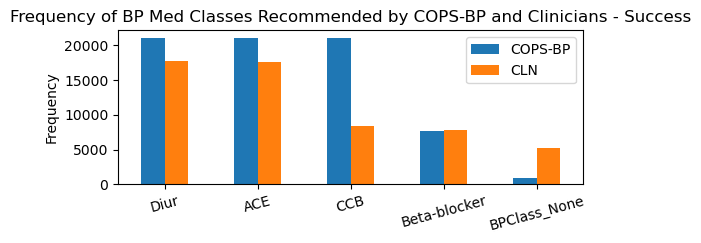


---BP---
med_cops:  {'Diur': 44994, 'ACE': 44869, 'CCB': 44619, 'Beta-blocker': 18034, 'BPClass_None': 2242}
med_cln:  {'ACE': 24317, 'Diur': 25424, 'CCB': 10983, 'BPClass_None': 27229, 'Beta-blocker': 15128}


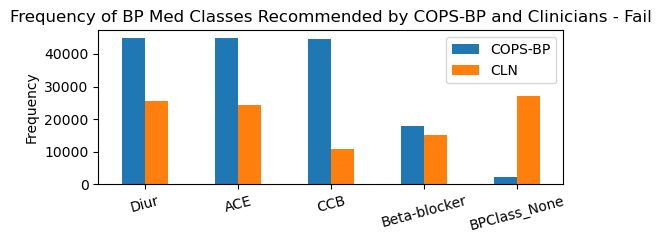

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list_2(df, flag, dataset):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS-{}'.format(flag), 'CLN']
    # print(med_df)

    med_df.plot.bar(figsize=(6,2))
    plt.legend(loc='upper right')

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    if flag == 'BP':
        plt.title('Frequency of BP Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'BG':
        plt.title('Frequency of BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'MM':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))         

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    plt.show()
    

plot_med_list_2(bp_df_suc, 'BP', 'Success')
plot_med_list_2(bp_df_fail, 'BP', 'Fail')



---BG---
med_cops:  {'Bingu': 28712, 'Meglit': 28639, 'Sulfon': 14656, 'Thiaz': 14605, 'BGClass_None': 1792}
med_cln:  {'BGClass_None': 8303, 'Bingu': 31563, 'Sulfon': 18040, 'Thiaz': 14155, 'Meglit': 5519}


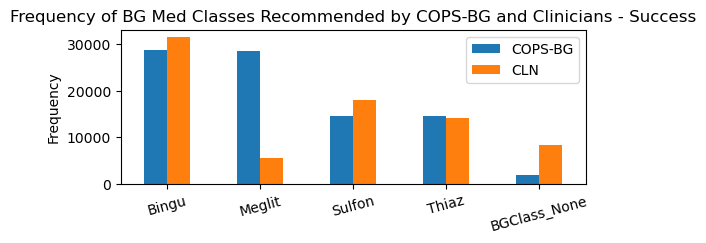


---BG---
med_cops:  {'Bingu': 77924, 'Meglit': 77880, 'Thiaz': 48235, 'Sulfon': 48602, 'BGClass_None': 6035}
med_cln:  {'BGClass_None': 24582, 'Bingu': 84195, 'Thiaz': 61089, 'Sulfon': 64976, 'Meglit': 12043}


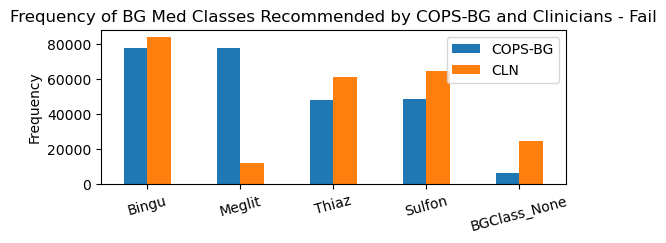

In [36]:
plot_med_list_2(bg_df_suc, 'BG', 'Success')
plot_med_list_2(bg_df_fail, 'BG', 'Fail')


---MM---
med_cops:  {'Diur': 18701, 'ACE': 18790, 'Bingu': 18685, 'Thiaz': 6316, 'BPBGClass_None': 739}
med_cln:  {'ACE': 15920, 'Diur': 16153, 'Bingu': 16688, 'Thiaz': 9481, 'BPBGClass_None': 1531}


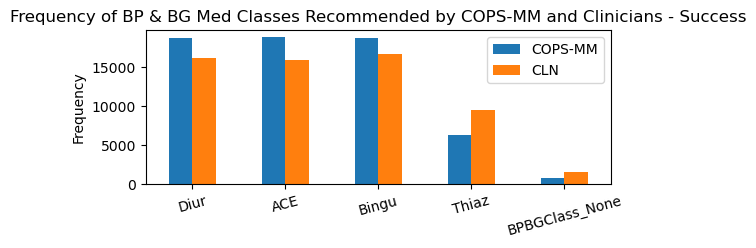


---MM---
med_cops:  {'Diur': 36813, 'ACE': 36699, 'Bingu': 36898, 'Thiaz': 13557, 'BPBGClass_None': 1758}
med_cln:  {'ACE': 19301, 'Diur': 20283, 'Bingu': 30624, 'Thiaz': 23237, 'BPBGClass_None': 6868}


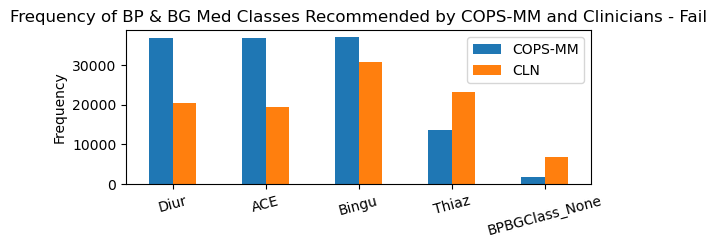

In [37]:
plot_med_list_2(bpbg_df_suc, 'MM', 'Success')
plot_med_list_2(bpbg_df_fail, 'MM', 'Fail')